In [1]:
import numpy as np 
import pandas as pd
import datetime as DT
import matplotlib as mlab

import calendar
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Cargamos los dataframes con los CSVs de Navent

postulantes_educacion = pd.read_csv('../Jupyter/zonajobs/fiuba_1_postulantes_educacion.csv')
postulantes_genero = pd.read_csv('../Jupyter/zonajobs/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('../Jupyter/zonajobs/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('../Jupyter/zonajobs/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('../Jupyter/zonajobs/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('../Jupyter/zonajobs/fiuba_6_avisos_detalle.csv')


In [12]:
#Juntamos los df postulantes_educacion y postulantes_genero para unificar los datos.
postulantes_datos = pd.merge(postulantes_educacion, postulantes_genero, on = 'idpostulante')

In [13]:
#Como la columna "nombre" no es muy descriptiva la vamos a llamar "nivel educativo" y también vamo a modificar "fechanacimento"
postulantes_datos.rename(columns={'nombre':'nivel educativo', 'fechanacimiento' : 'fecha de nacimiento'}, inplace = True)

In [74]:
#Creamos una columna llamada edad
now = pd.Timestamp(DT.datetime.now())
postulantes_datos['fecha de nacimiento'] = pd.to_datetime(postulantes_datos['fecha de nacimiento'],errors = 'coerce')
postulantes_datos['edad'] = (now - postulantes_datos['fecha de nacimiento']).astype('<m8[Y]')


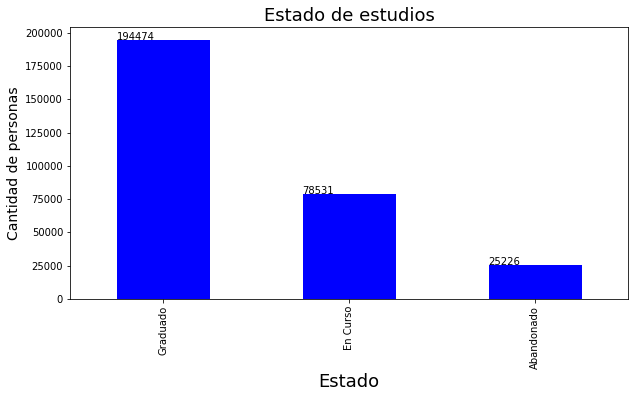

In [204]:
g = postulantes_datos["estado"].value_counts().plot(kind='bar', color = 'blue',figsize=(10,5))
g.set_title("Estado de estudios", fontsize=18)
g.set_xlabel("Estado",fontsize=18)
g.set_ylabel("Cantidad de personas", fontsize=14)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

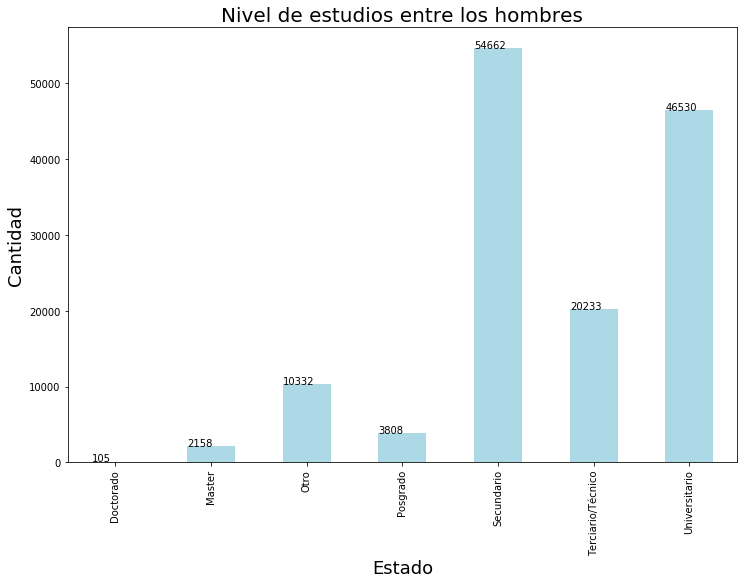

In [202]:
g = postulantes_datos[(postulantes_datos['sexo'] == "MASC")].groupby('nivel educativo').count()['idpostulante'].plot(kind='bar', color = 'lightblue', stacked=True, figsize=(12,8))
g.set_title("Nivel de estudios entre los hombres", fontsize=18)
g.set_xlabel("Estado",fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

g.title.set_fontsize(20)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()))


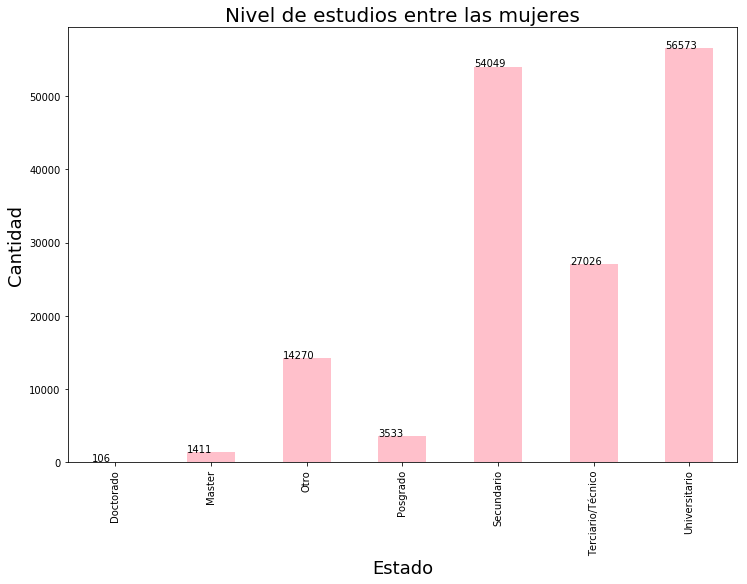

In [203]:
g = postulantes_datos[(postulantes_datos['sexo'] == "FEM")].groupby('nivel educativo').count()['idpostulante'].plot(kind='bar', color = 'pink', stacked=True, figsize=(12,8))
g.set_title("Nivel de estudios entre las mujeres", fontsize=18)
g.set_xlabel("Estado",fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

g.title.set_fontsize(20)
for p in g.patches:
    g.annotate(str(p.get_height()), (p.get_x(), p.get_height()))